In [1]:
import numpy as np
import uproot as uproot
import pandas as pd

import matplotlib.pyplot as plt

In [2]:
num_true_signal_uncollapsed = [
    0.0, 0.0, 2.644611, 0.000343, 0.673658, 0.0, # 1gNp and overflow, background, then Np sig, then 0p sig
    0.0, 0.0, 1.682415, 0.0, 7.545532, 0.0, # 1g0p
    0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, # NC Pi0 Np with overflow, background
    0.0, 0.007581, 0.301092, 0.915457, 1.216862, 0.943092, 0.705134, 0.442833, 0.27205, 0.16602, 0.109717, 0.05772, 0.043725, 0.031384, 0.01067, 0.025455, # NC Pi0 Np with overflow, Np sig
    0.0, 0.004736, 0.126005, 0.225691, 0.232783, 0.175976, 0.118599, 0.079376, 0.055884, 0.020959, 0.018903, 0.008332, 0.007212, 0.007277, 0.001588, 0.003381, # NC Pi0 Np with overflow, 0p sig
    0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, # NC Pi0 0p with overflow, background
    0.0, 0.085884, 0.754236, 0.821747, 0.6168, 0.429712, 0.249044, 0.138809, 0.073667, 0.032466, 0.015823, 0.012726, 0.00759, 0.003995, 0.002124, 0.001004, # NC Pi0 0p with overflow, Np sig
    0.0, 0.315534, 1.423453, 1.225524, 0.859233, 0.449364, 0.228664, 0.119037, 0.05052, 0.024253, 0.014229, 0.01067, 0.003947, 0.001939, 0.000935, 0.000536, # NC Pi0 0p with overflow, 0p sig
    0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, # numuCC Np with overflow, background
    0.0, 0.0, 0.000935, 0.02213, 0.057373, 0.09009, 0.101077, 0.095272, 0.090972, 0.076396, 0.052182, 0.043912, 0.041074, 0.020143, 0.012091, 0.023455, # numuCC Np with overflow, Np sig
    0.0, 0.0, 0.000536, 0.006925, 0.017063, 0.021858, 0.026183, 0.01784, 0.016127, 0.011606, 0.009666, 0.007745, 0.003342, 0.003801, 0.000468, 0.005037, # numuCC Np with overflow, 0p sig
    0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, # numuCC 0p with overflow, background
    0.0, 0.0, 0.003265, 0.027962, 0.059328, 0.067674, 0.060308, 0.052051, 0.036982, 0.036833, 0.021614, 0.009714, 0.011606, 0.007795, 0.002523, 0.008174, # numuCC 0p with overflow, Np sig
    0.0, 0.000468, 0.02352, 0.04728, 0.066435, 0.067755, 0.065967, 0.049516, 0.029441, 0.017715, 0.013262, 0.009452, 0.005088, 0.002592, 0.000935, 0.001939, # numuCC 0p with overflow, 0p sig
    0.0, 0.0, 0.0, 0.0, # 1g EXT
    0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, # NC Pi0 Np EXT
    0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, # NC Pi0 0p EXT
    0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, # numuCC Np EXT
    0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0 # numuCC 0p EXT
]

print(len(num_true_signal_uncollapsed))


272


In [3]:
diagonal_frac_var_uncollapsed = []

# flux uncertainties
full_flux_cov_mat = np.zeros((272, 272))
diagonal_frac_var_uncollapsed.append([])
for idx in range(1,17):
    f_cov = uproot.open(f"../TLee_Np0p/data_inputs/hist_rootfiles/XsFlux/cov_{idx}.root")

    cov_mat = f_cov[f"frac_cov_xf_mat_{idx}"].member("fElements")
    cov_mat = cov_mat.reshape((272, 272))
    
    full_flux_cov_mat += cov_mat
        
for i in range(272):
    diagonal_frac_var_uncollapsed[-1].append(full_flux_cov_mat[i,i])


for idx in range(17, 20): # Xs and reweighting uncertainties
    diagonal_frac_var_uncollapsed.append([])

    # 17 is Xs
    # 18 is uncorrelated reweighting uncertainty
    # 19 is correlated reweighting uncertainty
    
    f_cov = uproot.open(f"../TLee_Np0p/data_inputs/hist_rootfiles/XsFlux/cov_{idx}.root")
    #print(f_rw_cov.keys())

    cov_mat = f_cov[f"frac_cov_xf_mat_{idx}"].member("fElements")
    cov_mat = cov_mat.reshape((272, 272))
    
    for i in range(272):
        diagonal_frac_var_uncollapsed[-1].append(cov_mat[i,i])




In [4]:
for x in diagonal_frac_var_uncollapsed[0]:
    if x < 0: print("negative flux variance!")
for x in diagonal_frac_var_uncollapsed[1]:
    if x < 0: print("negative Xs variance!")
for x in diagonal_frac_var_uncollapsed[2]:
    if x < 0: print("negative uncor rw variance!")
for x in diagonal_frac_var_uncollapsed[3]:
    if x < 0: print("negative cor rw variance!")
    

In [5]:
diagonal_frac_var_xs_br_disabled = []
for i in range(272):
    if num_true_signal_uncollapsed[i] > 0:
        if diagonal_frac_var_uncollapsed[1][i] < 1.:
            print("too small signal Xs uncertainty!")
        else:
            diagonal_frac_var_xs_br_disabled.append(diagonal_frac_var_uncollapsed[1][i] - 1.)
    else:
        diagonal_frac_var_xs_br_disabled.append(diagonal_frac_var_uncollapsed[1][i])
        

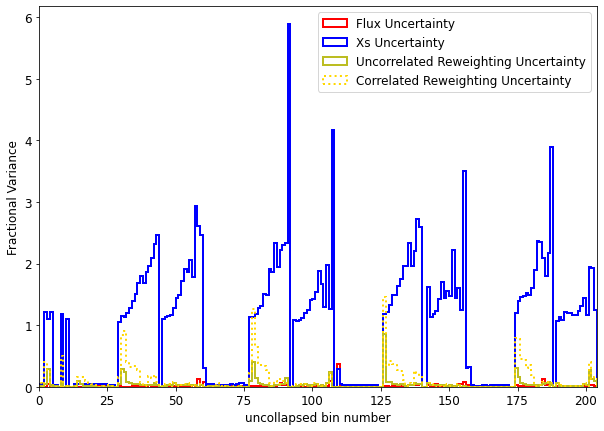

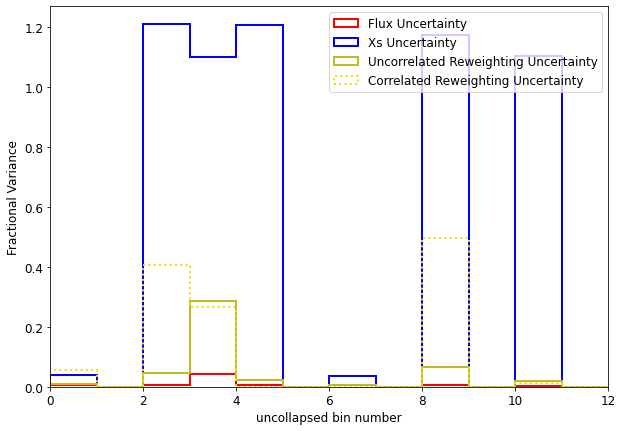

In [6]:
#num_bins_to_show = 272 # all bins
#num_bins_to_show = 12 # 2*3*2, 2 reco channels, three truth channels, normal and overflow, 12, all 1g bins
num_bins_to_show = 204 # 2*3*2+4*3*16 # all non-ext bins

lw = 2
plt.rcParams.update({'font.size': 12})

plt.figure(figsize=(10,7))
plt.hist([_+0.5 for _ in range(num_bins_to_show)], 
         weights=np.nan_to_num(np.array(diagonal_frac_var_uncollapsed[0][:num_bins_to_show])), 
         bins=num_bins_to_show, range=(0, num_bins_to_show), histtype="step", lw=lw, label="Flux Uncertainty", color="r")
plt.hist([_+0.5 for _ in range(num_bins_to_show)], 
         weights=np.nan_to_num(np.array(diagonal_frac_var_uncollapsed[1][:num_bins_to_show])), 
         bins=num_bins_to_show, range=(0, num_bins_to_show), histtype="step", lw=lw, label="Xs Uncertainty", color="b")
plt.hist([_+0.5 for _ in range(num_bins_to_show)], 
         weights=np.nan_to_num(np.array(diagonal_frac_var_uncollapsed[2][:num_bins_to_show])), 
         bins=num_bins_to_show, range=(0, num_bins_to_show), histtype="step", lw=lw, label="Uncorrelated Reweighting Uncertainty", color="tab:olive")
plt.hist([_+0.5 for _ in range(num_bins_to_show)], 
         weights=np.nan_to_num(np.array(diagonal_frac_var_uncollapsed[3][:num_bins_to_show])),
         bins=num_bins_to_show, range=(0, num_bins_to_show), histtype="step", lw=lw, ls="dotted", label="Correlated Reweighting Uncertainty", color="gold")
plt.xlabel("uncollapsed bin number")
plt.ylabel("Fractional Variance")
plt.xlim((0, num_bins_to_show))
plt.legend()
plt.show()

num_bins_to_show = 12
lw = 2
plt.rcParams.update({'font.size': 12})

plt.figure(figsize=(10,7))
plt.hist([_+0.5 for _ in range(num_bins_to_show)], 
         weights=np.nan_to_num(np.array(diagonal_frac_var_uncollapsed[0][:num_bins_to_show])), 
         bins=num_bins_to_show, range=(0, num_bins_to_show), histtype="step", lw=lw, label="Flux Uncertainty", color="r")
plt.hist([_+0.5 for _ in range(num_bins_to_show)], 
         weights=np.nan_to_num(np.array(diagonal_frac_var_uncollapsed[1][:num_bins_to_show])), 
         bins=num_bins_to_show, range=(0, num_bins_to_show), histtype="step", lw=lw, label="Xs Uncertainty", color="b")
plt.hist([_+0.5 for _ in range(num_bins_to_show)], 
         weights=np.nan_to_num(np.array(diagonal_frac_var_uncollapsed[2][:num_bins_to_show])), 
         bins=num_bins_to_show, range=(0, num_bins_to_show), histtype="step", lw=lw, label="Uncorrelated Reweighting Uncertainty", color="tab:olive")
plt.hist([_+0.5 for _ in range(num_bins_to_show)], 
         weights=np.nan_to_num(np.array(diagonal_frac_var_uncollapsed[3][:num_bins_to_show])),
         bins=num_bins_to_show, range=(0, num_bins_to_show), histtype="step", lw=lw, ls="dotted", label="Correlated Reweighting Uncertainty", color="gold")
plt.xlabel("uncollapsed bin number")
plt.ylabel("Fractional Variance")
plt.xlim((0, num_bins_to_show))
plt.legend()
plt.show()


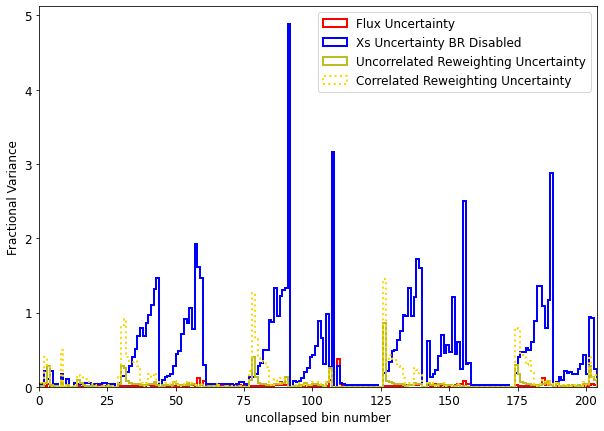

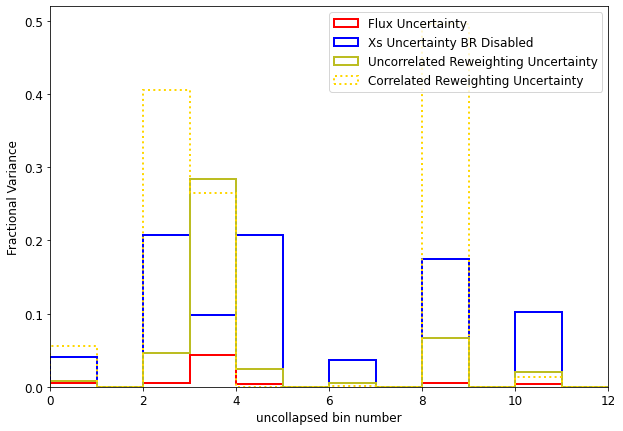

In [7]:
#num_bins_to_show = 272 # all bins
#num_bins_to_show = 12 # 2*3*2, 2 reco channels, three truth channels, normal and overflow, 12, all 1g bins
num_bins_to_show = 204 # 2*3*2+4*3*16 # all non-ext bins

lw = 2
plt.rcParams.update({'font.size': 12})

plt.figure(figsize=(10,7))
plt.hist([_+0.5 for _ in range(num_bins_to_show)], 
         weights=np.nan_to_num(np.array(diagonal_frac_var_uncollapsed[0][:num_bins_to_show])), 
         bins=num_bins_to_show, range=(0, num_bins_to_show), histtype="step", lw=lw, label="Flux Uncertainty", color="r")
plt.hist([_+0.5 for _ in range(num_bins_to_show)], 
         weights=np.nan_to_num(np.array(diagonal_frac_var_xs_br_disabled[:num_bins_to_show])), 
         bins=num_bins_to_show, range=(0, num_bins_to_show), histtype="step", lw=lw, label="Xs Uncertainty BR Disabled", color="b")
plt.hist([_+0.5 for _ in range(num_bins_to_show)], 
         weights=np.nan_to_num(np.array(diagonal_frac_var_uncollapsed[2][:num_bins_to_show])), 
         bins=num_bins_to_show, range=(0, num_bins_to_show), histtype="step", lw=lw, label="Uncorrelated Reweighting Uncertainty", color="tab:olive")
plt.hist([_+0.5 for _ in range(num_bins_to_show)], 
         weights=np.nan_to_num(np.array(diagonal_frac_var_uncollapsed[3][:num_bins_to_show])),
         bins=num_bins_to_show, range=(0, num_bins_to_show), histtype="step", lw=lw, ls="dotted", label="Correlated Reweighting Uncertainty", color="gold")
plt.xlabel("uncollapsed bin number")
plt.ylabel("Fractional Variance")
plt.xlim((0, num_bins_to_show))
plt.legend()
plt.show()

num_bins_to_show = 12
lw = 2
plt.rcParams.update({'font.size': 12})

plt.figure(figsize=(10,7))
plt.hist([_+0.5 for _ in range(num_bins_to_show)], 
         weights=np.nan_to_num(np.array(diagonal_frac_var_uncollapsed[0][:num_bins_to_show])), 
         bins=num_bins_to_show, range=(0, num_bins_to_show), histtype="step", lw=lw, label="Flux Uncertainty", color="r")
plt.hist([_+0.5 for _ in range(num_bins_to_show)], 
         weights=np.nan_to_num(np.array(diagonal_frac_var_xs_br_disabled[:num_bins_to_show])), 
         bins=num_bins_to_show, range=(0, num_bins_to_show), histtype="step", lw=lw, label="Xs Uncertainty BR Disabled", color="b")
plt.hist([_+0.5 for _ in range(num_bins_to_show)], 
         weights=np.nan_to_num(np.array(diagonal_frac_var_uncollapsed[2][:num_bins_to_show])), 
         bins=num_bins_to_show, range=(0, num_bins_to_show), histtype="step", lw=lw, label="Uncorrelated Reweighting Uncertainty", color="tab:olive")
plt.hist([_+0.5 for _ in range(num_bins_to_show)], 
         weights=np.nan_to_num(np.array(diagonal_frac_var_uncollapsed[3][:num_bins_to_show])),
         bins=num_bins_to_show, range=(0, num_bins_to_show), histtype="step", lw=lw, ls="dotted", label="Correlated Reweighting Uncertainty", color="gold")
plt.xlabel("uncollapsed bin number")
plt.ylabel("Fractional Variance")
plt.xlim((0, num_bins_to_show))
plt.legend()
plt.show()

In [8]:
# This depends on Configure_Lee.h and the read_TLee_v20 step, unlike the previous parts!

# currently has detvar disabled, which is when we saw weird negative chi^2 values

total_frac_var_collapsed = []
f_cov = uproot.open(f"../TLee_Np0p/file_collapsed_covariance_matrix.root")

f_cov.items()
cov_mat = f_cov["matrix_absolute_cov_newworld"].member("fElements")
cov_mat = cov_mat.reshape((68, 68))

for i in range(68):
    total_frac_var_collapsed.append(cov_mat[i,i])

#f_cov.items()


In [ ]:
fr

In [9]:
for x in total_frac_var_collapsed:
    if x < 0: print("negative total variance!")


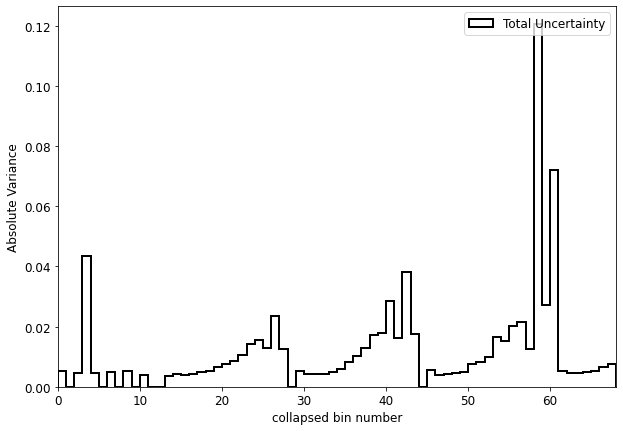

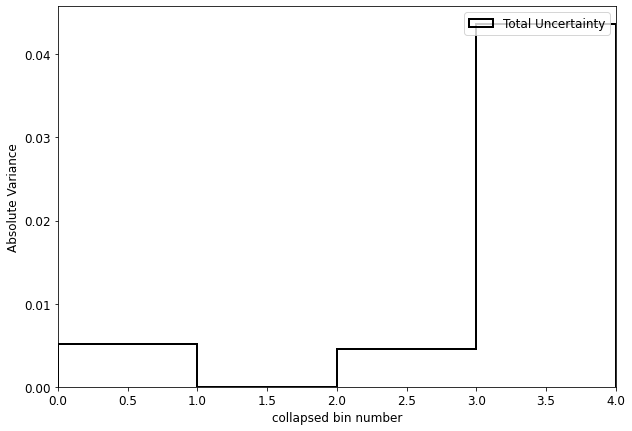

In [10]:
num_bins_to_show = 68

plt.figure(figsize=(10,7))
plt.hist([_+0.5 for _ in range(num_bins_to_show)], 
         weights=np.nan_to_num(np.array(diagonal_frac_var_uncollapsed[0][:num_bins_to_show])), 
         bins=num_bins_to_show, range=(0, num_bins_to_show), histtype="step", lw=lw, label="Total Uncertainty", color="k")
plt.xlabel("collapsed bin number")
plt.ylabel("Absolute Variance")
plt.xlim((0, num_bins_to_show))
plt.legend()
plt.show()

num_bins_to_show = 4

plt.figure(figsize=(10,7))
plt.hist([_+0.5 for _ in range(num_bins_to_show)], 
         weights=np.nan_to_num(np.array(diagonal_frac_var_uncollapsed[0][:num_bins_to_show])), 
         bins=num_bins_to_show, range=(0, num_bins_to_show), histtype="step", lw=lw, label="Total Uncertainty", color="k")
plt.xlabel("collapsed bin number")
plt.ylabel("Absolute Variance")
plt.xlim((0, num_bins_to_show))
plt.legend()
plt.show()

In [11]:
"""f = uproot.open(f"../LEEana/merge.root")
#f = uproot.open("../LEEana/merge.root")
#for k in f.keys():
#    print(k)

all_mc_preds = []
is_sig = []

for i in range(1, 25): # 1-18 are uncollapsed mc predictions, 19-24 are ext predictions
    current_preds = list(f[f"histo_{i}"].to_numpy(flow=True)[0][1:])
    all_mc_preds += current_preds # get the overflow bin only
    
    for _ in range(len(current_preds)):
        if i % 3 == 1:
            is_sig.append(False)
        else:
            is_sig.append(True)

all_mc_sig_preds = []

for i in range(len(all_mc_preds)):
    if is_sig[i]:
        all_mc_sig_preds.append(all_mc_preds[i])
    else:
        all_mc_sig_preds.append(0.)"""


'f = uproot.open(f"../LEEana/merge.root")\n#f = uproot.open("../LEEana/merge.root")\n#for k in f.keys():\n#    print(k)\n\nall_mc_preds = []\nis_sig = []\n\nfor i in range(1, 25): # 1-18 are uncollapsed mc predictions, 19-24 are ext predictions\n    current_preds = list(f[f"histo_{i}"].to_numpy(flow=True)[0][1:])\n    all_mc_preds += current_preds # get the overflow bin only\n    \n    for _ in range(len(current_preds)):\n        if i % 3 == 1:\n            is_sig.append(False)\n        else:\n            is_sig.append(True)\n\nall_mc_sig_preds = []\n\nfor i in range(len(all_mc_preds)):\n    if is_sig[i]:\n        all_mc_sig_preds.append(all_mc_preds[i])\n    else:\n        all_mc_sig_preds.append(0.)'

In [12]:
"""idx = 17

f_xs_cov = uproot.open(f"../LEEana/hist_rootfiles/XsFlux/cov_{idx}.root")
#print(f_xs_cov.keys())

cov_mat_frac = f_xs_cov[f"frac_cov_xf_mat_{idx}"].member("fElements")
cov_mat_frac = cov_mat_frac.reshape((272, 272))

cov_mat = f_xs_cov[f"cov_xf_mat_{idx}"].member("fElements")
cov_mat = cov_mat.reshape((272, 272))

vec_mean = f_xs_cov[f"vec_mean_{idx}"].member("fElements")

cov_diags = []
cov_frac_diags = []
types = []
for i in range(272):
    if   i < 2: s = "1gNp, MC bkg"
    elif i < 4: s = "1gNp, Np sig"
    elif i < 6: s = "1gNp, 0p sig"
    elif i < 8: s = "1g0p, MC bkg"
    elif i < 10: s = "1g0p, Np sig"
    elif i < 12: s = "1g0p, 0p sig"
    elif i < 12 + 1*16: s = "NC Pi0 Np, bkg"
    elif i < 12 + 2*16: s = "NC Pi0 Np, Np sig"
    elif i < 12 + 3*16: s = "NC Pi0 Np, 0p sig"
    elif i < 12 + 4*16: s = "NC Pi0 0p, bkg"
    elif i < 12 + 5*16: s = "NC Pi0 0p, Np sig"
    elif i < 12 + 6*16: s = "NC Pi0 0p, 0p sig"
    elif i < 12 + 7*16: s = "numuCC Np bkg"
    elif i < 12 + 8*16: s = "numuCC Np, Np sig"
    elif i < 12 + 9*16: s = "numuCC Np, 0p sig"
    elif i < 12 + 10*16: s = "numuCC 0p, bkg"
    elif i < 12 + 11*16: s = "numuCC 0p, Np sig"
    elif i < 12 + 12*16: s = "numuCC 0p, 0p sig"
    elif i < 12 + 12*16 + 2: s = "1gNp, EXT bkg"
    elif i < 12 + 12*16 + 4: s = "1g0p, EXT bkg"
    elif i < 12 + 12*16 + 4 + 1*16: s = "NC Pi0 Np, EXT bkg"
    elif i < 12 + 12*16 + 4 + 2*16: s = "NC Pi0 0p, EXT bkg"
    elif i < 12 + 12*16 + 4 + 3*16: s = "numuCC Np, EXT bkg"
    elif i < 12 + 12*16 + 4 + 4*16: s = "numuCC 0p, EXT bkg"
    types.append(s)
    cov_diags.append(cov_mat[i][i])
    cov_frac_diags.append(cov_mat_frac[i][i])


d = {
    "type" : types,
    "merge.root pred" : all_mc_preds,
    "vec mean" : vec_mean,
    "cov diagonal" : cov_diags,
    "cov frac diagonal" : cov_frac_diags,
}

pd.set_option('display.max_rows', None)

pd.DataFrame(data=d)"""


'idx = 17\n\nf_xs_cov = uproot.open(f"../LEEana/hist_rootfiles/XsFlux/cov_{idx}.root")\n#print(f_xs_cov.keys())\n\ncov_mat_frac = f_xs_cov[f"frac_cov_xf_mat_{idx}"].member("fElements")\ncov_mat_frac = cov_mat_frac.reshape((272, 272))\n\ncov_mat = f_xs_cov[f"cov_xf_mat_{idx}"].member("fElements")\ncov_mat = cov_mat.reshape((272, 272))\n\nvec_mean = f_xs_cov[f"vec_mean_{idx}"].member("fElements")\n\ncov_diags = []\ncov_frac_diags = []\ntypes = []\nfor i in range(272):\n    if   i < 2: s = "1gNp, MC bkg"\n    elif i < 4: s = "1gNp, Np sig"\n    elif i < 6: s = "1gNp, 0p sig"\n    elif i < 8: s = "1g0p, MC bkg"\n    elif i < 10: s = "1g0p, Np sig"\n    elif i < 12: s = "1g0p, 0p sig"\n    elif i < 12 + 1*16: s = "NC Pi0 Np, bkg"\n    elif i < 12 + 2*16: s = "NC Pi0 Np, Np sig"\n    elif i < 12 + 3*16: s = "NC Pi0 Np, 0p sig"\n    elif i < 12 + 4*16: s = "NC Pi0 0p, bkg"\n    elif i < 12 + 5*16: s = "NC Pi0 0p, Np sig"\n    elif i < 12 + 6*16: s = "NC Pi0 0p, 0p sig"\n    elif i < 12 + 7*16